<a href="https://colab.research.google.com/github/DSYJ94/Machine-Deep-Learning-/blob/main/Linear_Regression_Student_Scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# If using Google Colab and uploading your data to the runtime session:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the file

# Importing CSV file into Dataframe
df = pd.read_csv("student_data.csv")

# Detailing info about the dataset
print(df.columns)
display(df)

Saving student_data.csv to student_data (6).csv
Index(['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)',
       'Grades'],
      dtype='object')


,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0
...,...,...,...,...,...
1383,0.44549,5.5,8.0,51.0,41.0
1384,0.52466,4.9,6.5,63.0,37.0
1385,0.88197,3.9,6.2,54.0,36.0
1386,0.47336,3.5,7.3,61.0,34.0


In [ ]:
# Creating Mathematical functions using Numpy functions
def rmse(targets, predictions):
    # Convert inputs to numpy arrays to ensure proper calculation
    targets = np.array(targets).flatten()
    predictions = np.array(predictions).flatten()

    # Calculate difference and square it
    diff = predictions - targets
    squared_diff = np.square(diff)

    # Calculate mean and sqrt
    mse = np.mean(squared_diff)
    rmse = np.sqrt(mse)
    return rmse

def calculateWeights(x_train, y_train):
    w = np.linalg.inv(np.transpose(x_train).dot(x_train)).dot(np.transpose(x_train).dot(y_train))
    return w

# Picking specific columns
df_regression = df[['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)']]

# Setting and randomising data for training and testing
train_size = int(0.8 * len(df_regression)) # Setting the training data size as 80% of the total dataset
indices = np.random.permutation(len(df_regression)) # Randomising the entire dataset

# Splitting indices
train_indices = indices[:train_size] # Takes first 80% of dataset, randomisation already kicks in here
test_indices = indices[train_size:] # Takes last 20% of dataset



In [ ]:
# Creating training data for x variables
x_train = df_regression.iloc[train_indices,np.r_[0:4]] # picking columns 0-3
print(f"""The dataframe below is our variable inputs:
{x_train}""")

# Creating training data for y prediction outputs
y_train = df.iloc[train_indices, [4]]
print(f"""The dataframe below is our prediction output:
{y_train}""")

# Creating test variables for x and y axis
xtest = df_regression.iloc[test_indices,np.r_[0:4]]
ytest = df.iloc[test_indices, [4]]

# Creating the x matrices
x_train.insert(loc=4, column="b", value=1)
xtest.insert(loc=4, column="b", value=1)

The dataframe below is our variable inputs:
      Socioeconomic Score  Study Hours  Sleep Hours  Attendance (%)
58                0.73301          1.9          9.5            73.0
554               0.16671          2.8          9.9            58.0
921               0.95685          3.7          8.9            56.0
343               0.37248          2.6          6.5            49.0
1360              0.26702          0.8          8.3            49.0
...                   ...          ...          ...             ...
719               0.59102          4.0          7.1            73.0
1286              0.92848          3.5          7.4            53.0
560               0.56089          2.5          7.7            42.0
164               0.15820          3.0          9.7            42.0
250               0.41039          5.2          7.4            66.0

[1110 rows x 4 columns]
The dataframe below is our prediction output:
      Grades
58      35.0
554     35.0
921     49.0
343     33.0
1360

In [ ]:
# Checking the matrices
print(x_train)

# Deriving existing weights of dataset
weight = calculateWeights(x_train,y_train)

print(weight)
print(weight.shape)

      Socioeconomic Score  Study Hours  Sleep Hours  Attendance (%)  b
58                0.73301          1.9          9.5            73.0  1
554               0.16671          2.8          9.9            58.0  1
921               0.95685          3.7          8.9            56.0  1
343               0.37248          2.6          6.5            49.0  1
1360              0.26702          0.8          8.3            49.0  1
...                   ...          ...          ...             ... ..
719               0.59102          4.0          7.1            73.0  1
1286              0.92848          3.5          7.4            53.0  1
560               0.56089          2.5          7.7            42.0  1
164               0.15820          3.0          9.7            42.0  1
250               0.41039          5.2          7.4            66.0  1

[1110 rows x 5 columns]
[[11.9707474 ]
 [ 4.27955007]
 [ 0.15787269]
 [-0.0758889 ]
 [17.74327026]]
(5, 1)


In [ ]:
# Y training error values
y_train_predict = x_train.dot(weight)
y_test_predict = xtest.dot(weight)

# Print intermediate values for debugging
print("y_train_predict:", y_train_predict)
print("y_test_predict:", y_test_predict)
print("y_train:", y_train)
print("ytest:", ytest)

train_error = rmse(y_train,y_train_predict)
test_error = rmse(ytest,y_test_predict)

print(f"Training RMSE: {train_error:.2f}")
print(f"Testing RMSE: {test_error:.2f}")


y_train_predict:               0
58    30.608994
554   28.883037
921   42.187104
343   30.636581
1360  21.955127
...         ...
719   37.517428
1286  40.982441
560   33.184704
164   30.819724
250   41.069196

[1110 rows x 1 columns]
y_test_predict:               0
145   35.086126
1331  50.994283
59    46.497563
662   60.504426
27    37.234084
...         ...
1063  58.155261
1373  46.118472
193   27.059425
1179  47.347380
739   34.529440

[278 rows x 1 columns]
y_train:       Grades
58      35.0
554     35.0
921     49.0
343     33.0
1360    33.0
...      ...
719     34.0
1286    41.0
560     35.0
164     34.0
250     38.0

[1110 rows x 1 columns]
ytest:       Grades
145     34.0
1331    47.0
59      48.0
662     61.0
27      34.0
...      ...
1063    65.0
1373    44.0
193     34.0
1179    42.0
739     35.0

[278 rows x 1 columns]
Training RMSE: 4.51
Testing RMSE: 4.43


In [ ]:
# Predict based on random inputs
socioeconomic_score = 0.69840
study_hours = 4.4
sleep_hours = 6.5
attendance_percentage = 0.69
bias = 1
input_list = [socioeconomic_score,study_hours,sleep_hours,attendance_percentage,bias]
print(input_list)

# Creating prediction array
predict_array = np.array([input_list])

# Predict!
print(f"""With a socioeconomic score of:{socioeconomic_score}, study hours of: {study_hours}, sleep hours of:{sleep_hours}, attendance of: {attendance_percentage*100}%, a student is likely to score:""")
print(predict_array.dot(weight))

[0.6984, 4.4, 6.5, 0.69, 1]
With a socioeconomic score of:0.6984, study hours of: 4.4, sleep hours of:6.5, attendance of: 69.0%, a student is likely to score:
[[45.90746968]]


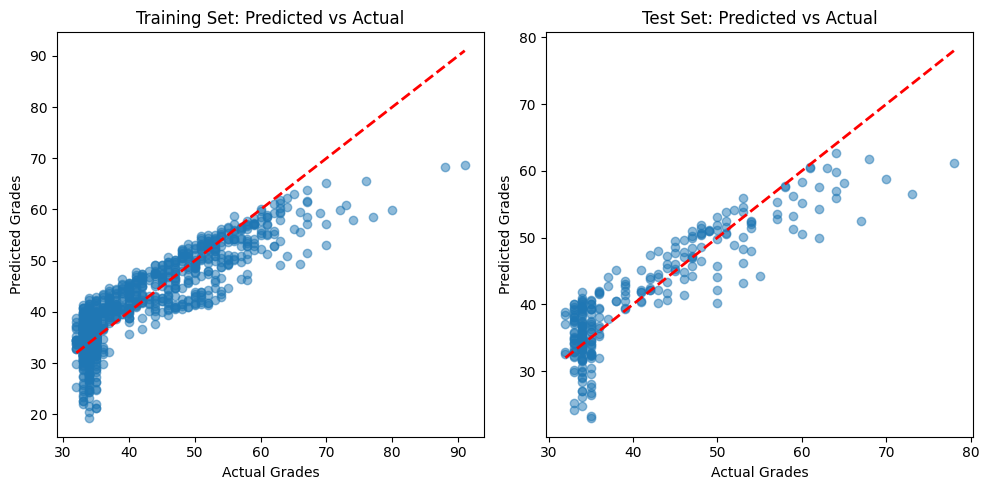

In [ ]:
# Visualising using Matplotlb

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_predict, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Training Set: Predicted vs Actual')

plt.subplot(1, 2, 2)
plt.scatter(ytest, y_test_predict, alpha=0.5)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--', lw=2)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Test Set: Predicted vs Actual')

plt.tight_layout()
plt.show()